In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [2]:
train = pd.read_csv('/Users/arjunreddypulugu/Documents/6040/train.csv')
log_train = pd.read_csv('/Users/arjunreddypulugu/Documents/6040/log_train.csv')

In [3]:
train.shape, log_train.shape

((84377, 141), (5710093, 5))

In [4]:
pd.set_option('display.max_columns', 150)

# -------Exploratory Data Analysis --------

# train set

In [5]:
train.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,label
0,7054.0,2.015152,0.0,32.0,NaN,4.0,NaN,NaN,7.0,6.0,2.0,5.0,2.0,15.0,16.0,6.0,9.0,10.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN,8.0,1.0,14.0,16.0,39.0,16.0,13.0,8.0,4.0,15.0,4.0,2.0,2.0,NaN,0.0,NaN,2.0,1.0,1.0,2.0,3.0,0.0,2.0,2.0,21.0,1.0,NaN,10.0,NaN,0.0,NaN,9.142857,1.0,NaN,NaN,NaN,NaN,0.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,0.0,18.0,NaN,2574.0,0.0,NaN,5.838710,7.0,1.0,5.0,8.0,11.0,27.0,2.0,3.0,6.0,4.0,NaN,NaN,1.000000,0.0,5.0,0.0,NaN,4.0,5.0,4.0,1.0,1.0,4.0,5.0,16.0,13.0,7.0,13.0,0.0,14.0,5.0,13.0,9.0,15.0,2.0,14.0,6.0,2.0,11.0,4.0,5.0,0.0,NaN,2.0,10.0,NaN,NaN,1.0,1.0,18.0,13.0,0.0,NaN,0.0,NaN,NaN,1.0,1.0,1.0,3.0,2.0,NaN,1
1,147131.0,1.000000,NaN,2.0,NaN,NaN,0.0,NaN,6.0,5.0,8.0,4.0,7.0,12.0,1.0,4.0,7.0,3.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,13.0,7.0,13.0,15.0,17.0,12.0,14.0,8.0,9.0,4.0,14.0,1.0,1.0,NaN,0.0,NaN,2.0,2.0,11.0,1.0,2.0,NaN,1.0,1.0,4.0,1.0,NaN,2.0,NaN,NaN,NaN,1.000000,3.0,0.0,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,16.0,NaN,961.0,NaN,NaN,1.751880,1.0,10.0,6.0,8.0,3.0,3.0,11.0,9.0,9.0,3.0,0.0,NaN,1.862069,NaN,4.0,NaN,NaN,2.0,2.0,4.0,8.0,2.0,1.0,3.0,5.0,9.0,16.0,16.0,NaN,4.0,3.0,1.0,14.0,2.0,16.0,14.0,17.0,1.0,4.0,6.0,4.0,0.0,NaN,2.0,1.0,NaN,NaN,1.0,1.0,9.0,4.0,NaN,NaN,NaN,NaN,0.0,3.0,1.0,1.0,2.0,10.0,NaN,1
2,132068.0,1.000000,NaN,1.0,NaN,2.0,NaN,0.0,9.0,1.0,7.0,10.0,7.0,17.0,3.0,9.0,10.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,17.0,3.0,7.0,20.0,17.0,5.0,13.0,3.0,8.0,13.0,14.0,2.0,1.0,NaN,NaN,NaN,2.0,1.0,2.0,2.0,1.0,0.0,2.0,3.0,1.0,1.0,NaN,2.0,0.0,NaN,NaN,2.000000,1.0,0.0,NaN,NaN,0.0,0.0,NaN,1.0,1.0,NaN,NaN,0.0,1.0,NaN,NaN,10.0,0.0,460.0,NaN,NaN,1.000000,3.0,8.0,4.0,2.0,8.0,1.0,2.0,3.0,6.0,4.0,NaN,NaN,1.000000,0.0,2.0,NaN,NaN,7.0,1.0,3.0,1.0,2.0,2.0,5.0,5.0,14.0,13.0,14.0,0.0,19.0,6.0,17.0,9.0,16.0,12.0,19.0,17.0,2.0,5.0,13.0,2.0,0.0,NaN,1.0,1.0,NaN,0.0,1.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,0.0,1.0,1.0,2.0,2.0,4.0,NaN,1
3,85195.0,2.071429,0.0,1.0,NaN,2.0,NaN,NaN,8.0,7.0,9.0,4.0,18.0,8.0,5.0,1.0,6.0,9.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,5.0,9.0,20.0,12.0,10.0,1.0,16.0,12.0,11.0,16.0,16.0,2.0,33.0,NaN,NaN,NaN,2.0,21.0,60.0,2.0,1.0,NaN,2.0,1.0,25.0,1.0,NaN,14.0,NaN,0.0,NaN,6.263158,8.0,NaN,0.0,0.0,NaN,0.0,NaN,1.0,1.0,0.0,NaN,0.0,1.0,NaN,0.0,18.0,NaN,934.0,0.0,0.0,6.384615,8.0,7.0,3.0,17.0,9.0,7.0,10.0,4.0,6.0,10.0,0.0,0.0,3.734375,NaN,5.0,0.0,NaN,5.0,4.0,9.0,1.0,2.0,60.0,13.0,28.0,7.0,6.0,5.0,0.0,13.0,9.0,20.0,6.0,13.0,17.0,34.0,70.0,2.0,7.0,20.0,5.0,NaN,0.0,2.8,14.0,0.0,NaN,1.0,1.0,12.0,12.0,NaN,NaN,NaN,NaN,0.0,2.0,2.0,1.0,4.0,2.0,NaN,1
4,191948.0,2.000000,NaN,2.0,0.0,2.0,NaN,NaN,14.0,2.0,2.0,4.0,4.0,3.0,7.0,9.0,7.0,2.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,6.0,12.0,20.0,8.0,7.0,6.0,8.0,19.0,7.0,20.0,20.0,4.0,2.0,NaN,NaN,0.0,2.0,2.0,2.0,3.0,2.0,0.0,11.0,2.0,3.0,1.0,0.0,2.0,NaN,0.0,0.0,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,1.0,1.0,0.0,0.0,NaN,1.0,NaN,NaN,3.0,NaN,1655.0,NaN,NaN,2.250000,1.0,5.0,3.0,5.0,2.0,4.0,9.0,1.0,5.0,4.0,0.0,NaN,1.000000,0.0,7.0,NaN,0.0,4.0,10.0,9.0,19.0,1.0,2.0,1.0,11.0,10.0,18.0,9.0,0.0,20.0,9.0,12.0,11.0,4.0,13.0,12.0,6.0,1.0,14.0,4.0,7.0,0.0,NaN,1.0,2.0,NaN,NaN,1.0,1.0,14.0,3.0,NaN,NaN,0.0,0.0,NaN,2.0,2.0,1.0,2.0,6.0,0.0,1


In [6]:
train.isna().sum()

ID         465
X1         418
X2       59198
X3         431
X4       59246
         ...  
X136       410
X137       448
X138       411
X139     59396
label        0
Length: 141, dtype: int64

#Weeding out columns with more than half of the values as null since it is not plausible to impute more than a half nulls


In [7]:
#Weeding out columns with more than half of the values as null

def columns_with_more_than_half_null(train):
    null_counts = train.isnull().sum()  # Count null values in each column
    total_rows = len(train)
    columns_with_more_than_half_null = []

    for column, count in null_counts.items():
        if count > total_rows / 2:  # Check if null count exceeds half of the total rows
            columns_with_more_than_half_null.append(column)

    return columns_with_more_than_half_null

# Call the function with your DataFrame to get columns where more than half of the values are null
useless = columns_with_more_than_half_null(train)
print("Columns with more than half null values:", useless)
print("No of Columns with more than half null values:", len(useless))

Columns with more than half null values: ['X2', 'X4', 'X6', 'X7', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X38', 'X39', 'X40', 'X46', 'X51', 'X53', 'X54', 'X55', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X66', 'X67', 'X68', 'X70', 'X71', 'X73', 'X75', 'X76', 'X88', 'X89', 'X91', 'X93', 'X94', 'X106', 'X119', 'X120', 'X123', 'X124', 'X129', 'X130', 'X131', 'X132', 'X133', 'X139']
No of Columns with more than half null values: 49


In [8]:
train_new = train.drop(columns = useless, axis =1)

In [9]:
train_new.isna().sum().sum()

38156

In [10]:
train_new.describe()

,ID,X1,X3,X5,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X41,X42,X43,X44,X45,X47,X48,X49,X50,X52,X56,X57,X64,X65,X69,X72,X74,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X90,X92,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X121,X122,X125,X126,X127,X128,X134,X135,X136,X137,X138,label
count,83912.000000,83959.000000,83946.000000,83947.000000,83967.000000,84008.000000,83975.000000,83987.000000,83955.000000,83973.000000,83929.000000,83963.000000,83962.000000,83959.000000,83958.000000,83965.000000,83970.000000,83976.000000,83980.000000,83988.000000,83941.000000,83953.000000,83958.000000,83944.000000,83948.000000,83905.000000,83976.000000,83978.000000,83928.000000,83930.000000,83970.000000,83974.000000,83930.000000,83965.000000,83961.000000,83986.000000,83951.000000,83956.000000,83965.000000,83919.000000,83948.000000,83939.000000,83950.000000,83973.000000,83929.000000,83948.000000,83941.000000,83957.000000,83941.000000,83962.000000,83961.000000,83965.000000,83953.000000,83966.000000,83951.000000,83989.000000,83949.000000,83960.000000,83968.000000,83968.000000,83953.000000,83971.000000,83963.000000,83956.000000,83928.000000,83940.000000,83952.000000,83991.000000,83996.000000,83954.000000,83980.000000,84007.000000,83977.00000,83987.000000,83972.000000,83936.000000,83948.000000,83924.000000,83951.000000,83963.000000,83933.000000,83945.000000,83961.000000,83936.000000,83966.000000,83943.000000,83936.000000,83985.000000,83967.000000,83929.000000,83966.000000,84377.000000
mean,100386.093098,1.585512,11.740988,1.906763,9.415139,9.026486,8.502042,7.922631,12.688667,12.633084,12.551907,8.093160,8.052988,13.831430,12.464363,12.650914,12.716625,12.850088,12.793498,12.518324,12.419068,12.467690,12.566521,12.744222,12.718552,2.238424,10.132216,11.176522,10.173101,10.701430,2.238883,12.504930,11.031371,11.236634,27.014054,1.000905,7.731510,7.316166,6.305294,1.000027,1.005212,1.005379,10.774771,2480.769307,6.824398,9.021037,9.182378,8.278190,12.029473,9.518056,8.967390,8.999464,8.849535,9.222435,9.869364,5.055471,9.413108,6.836446,8.840713,9.683141,10.946494,7.827309,7.863607,9.760779,12.341853,11.228651,10.792322,10.703159,12.306515,12.273638,12.440545,12.446260,12.90395,12.564635,12.469680,12.633816,4.208808,12.516813,12.551607,9.410776,5.061282,7.363285,1.142852,1.129956,11.095181,20.785152,2.381040,2.567792,2.254326,2.334092,5.735965,0.792728
std,57993.333045,0.535283,34.643444,1.036347,17.288043,15.491942,13.644927,12.402860,12.810191,12.963943,12.529402,14.503711,13.481138,28.882368,13.875154,14.637749,13.891236,14.432178,14.334957,13.703340,13.278109,13.249692,13.267787,14.165527,14.466292,3.511218,30.026372,31.218848,30.090452,32.437012,3.507194,35.744037,29.840560,31.884643,54.615948,0.054987,22.415262,8.973501,11.724296,0.005613,0.301954,0.122192,7.008842,2114.301087,8.633683,13.711790,14.127946,12.354702,11.045928,19.138137,13.778297,13.594101,13.435822,13.798543,15.591675,7.904405,13.142299,5.876158,13.763075,15.438324,18.383853,19.699956,20.486866,17.188237,12.149863,8.642964,7.154563,6.637250,12.994317,13.227290,13.381765,14.169567,14.90645,13.884921,18.330795,15.361021,6.271950,14.445830,13.340087,13.137741,8.752162,22.402294,2.659613,2.491213,8.140023,38.831352,2.050817,2.086498,1.989084,2.029105,2.988488,0.405355
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,119.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0

In [11]:
train_new.columns

Index(['ID', 'X1', 'X3', 'X5', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14',
       'X15', 'X16', 'X17', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X41', 'X42', 'X43', 'X44',
       'X45', 'X47', 'X48', 'X49', 'X50', 'X52', 'X56', 'X57', 'X64', 'X65',
       'X69', 'X72', 'X74', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83',
       'X84', 'X85', 'X86', 'X87', 'X90', 'X92', 'X95', 'X96', 'X97', 'X98',
       'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X107', 'X108',
       'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117',
       'X118', 'X121', 'X122', 'X125', 'X126', 'X127', 'X128', 'X134', 'X135',
       'X136', 'X137', 'X138', 'label'],
      dtype='object')

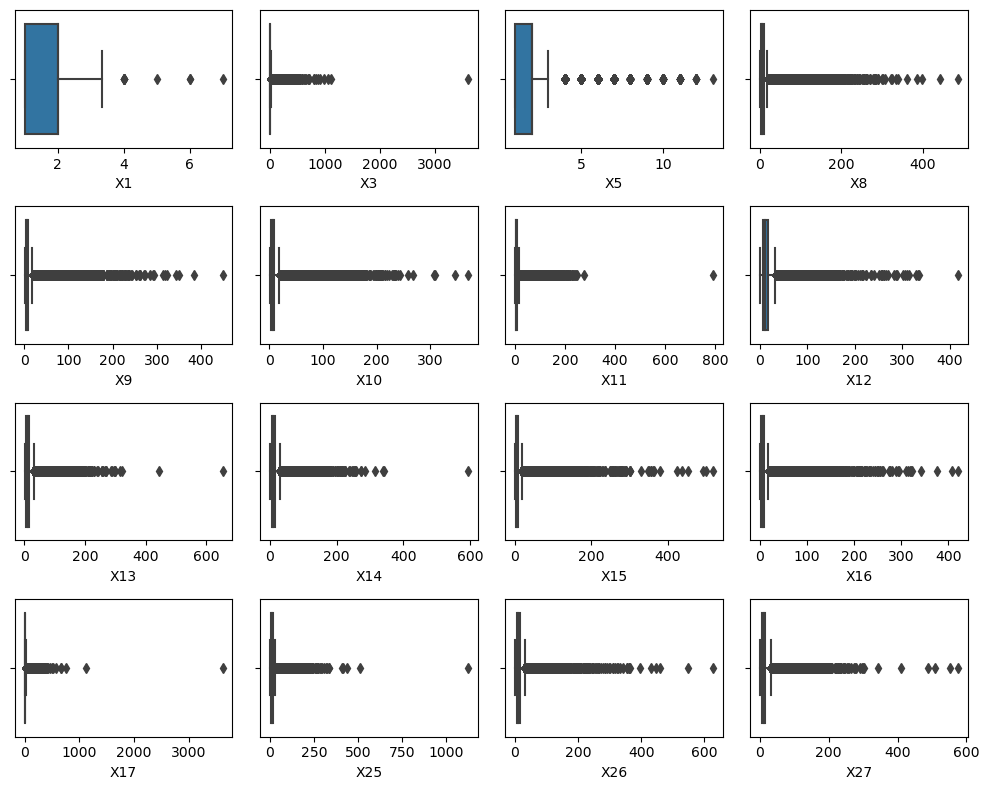

In [12]:
fig, axes = plt.subplots(nrows = 4, ncols=4, figsize = (10, 8))
axes = axes.flatten()

for i, col in enumerate(['X1', 'X3', 'X5', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14',
                         'X15', 'X16', 'X17', 'X25', 'X26', 'X27']):
    sns.boxplot(x= train_new[col], ax = axes[i])
    axes[i].set_title('')
plt.tight_layout()
plt.show()

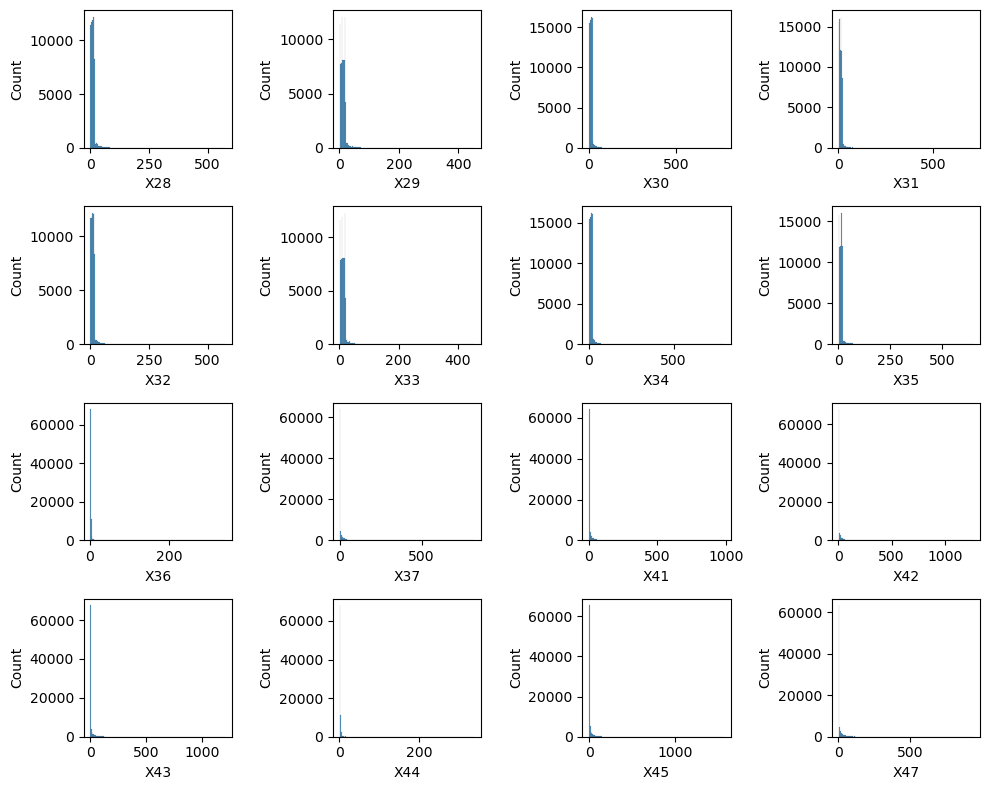

In [13]:
fig, axes = plt.subplots(nrows = 4, ncols=4, figsize = (10, 8))
axes = axes.flatten()

for i, col in enumerate(['X28', 'X29', 'X30', 'X31','X32', 'X33', 'X34', 'X35', 
                         'X36', 'X37', 'X41', 'X42', 'X43', 'X44','X45', 'X47']):
    sns.histplot(x= train_new[col], ax = axes[i], bins = 200)
    axes[i].set_title('')
plt.tight_layout()
plt.show()

In [14]:
train_new.head()

,ID,X1,X3,X5,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X41,X42,X43,X44,X45,X47,X48,X49,X50,X52,X56,X57,X64,X65,X69,X72,X74,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X90,X92,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X121,X122,X125,X126,X127,X128,X134,X135,X136,X137,X138,label
0,7054.0,2.015152,32.0,4.0,7.0,6.0,2.0,5.0,2.0,15.0,16.0,6.0,9.0,10.0,8.0,1.0,14.0,16.0,39.0,16.0,13.0,8.0,4.0,15.0,4.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,21.0,1.0,10.0,9.142857,1.0,1.0,1.0,1.0,18.0,2574.0,5.838710,7.0,1.0,5.0,8.0,11.0,27.0,2.0,3.0,6.0,4.0,1.000000,5.0,4.0,5.0,4.0,1.0,1.0,4.0,5.0,16.0,13.0,7.0,13.0,14.0,5.0,13.0,9.0,15.0,2.0,14.0,6.0,2.0,11.0,4.0,5.0,2.0,10.0,1.0,1.0,18.0,13.0,1.0,1.0,1.0,3.0,2.0,1
1,147131.0,1.000000,2.0,NaN,6.0,5.0,8.0,4.0,7.0,12.0,1.0,4.0,7.0,3.0,13.0,7.0,13.0,15.0,17.0,12.0,14.0,8.0,9.0,4.0,14.0,1.0,1.0,2.0,2.0,11.0,1.0,2.0,1.0,1.0,4.0,1.0,2.0,1.000000,3.0,1.0,1.0,1.0,16.0,961.0,1.751880,1.0,10.0,6.0,8.0,3.0,3.0,11.0,9.0,9.0,3.0,1.862069,4.0,2.0,2.0,4.0,8.0,2.0,1.0,3.0,5.0,9.0,16.0,16.0,4.0,3.0,1.0,14.0,2.0,16.0,14.0,17.0,1.0,4.0,6.0,4.0,2.0,1.0,1.0,1.0,9.0,4.0,3.0,1.0,1.0,2.0,10.0,1
2,132068.0,1.000000,1.0,2.0,9.0,1.0,7.0,10.0,7.0,17.0,3.0,9.0,10.0,1.0,17.0,3.0,7.0,20.0,17.0,5.0,13.0,3.0,8.0,13.0,14.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,3.0,1.0,1.0,2.0,2.000000,1.0,1.0,1.0,1.0,10.0,460.0,1.000000,3.0,8.0,4.0,2.0,8.0,1.0,2.0,3.0,6.0,4.0,1.000000,2.0,7.0,1.0,3.0,1.0,2.0,2.0,5.0,5.0,14.0,13.0,14.0,19.0,6.0,17.0,9.0,16.0,12.0,19.0,17.0,2.0,5.0,13.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,4.0,1
3,85195.0,2.071429,1.0,2.0,8.0,7.0,9.0,4.0,18.0,8.0,5.0,1.0,6.0,9.0,5.0,9.0,20.0,12.0,10.0,1.0,16.0,12.0,11.0,16.0,16.0,2.0,33.0,2.0,21.0,60.0,2.0,1.0,2.0,1.0,25.0,1.0,14.0,6.263158,8.0,1.0,1.0,1.0,18.0,934.0,6.384615,8.0,7.0,3.0,17.0,9.0,7.0,10.0,4.0,6.0,10.0,3.734375,5.0,5.0,4.0,9.0,1.0,2.0,60.0,13.0,28.0,7.0,6.0,5.0,13.0,9.0,20.0,6.0,13.0,17.0,34.0,70.0,2.0,7.0,20.0,5.0,2.8,14.0,1.0,1.0,12.0,12.0,2.0,2.0,1.0,4.0,2.0,1
4,191948.0,2.000000,2.0,2.0,14.0,2.0,2.0,4.0,4.0,3.0,7.0,9.0,7.0,2.0,6.0,12.0,20.0,8.0,7.0,6.0,8.0,19.0,7.0,20.0,20.0,4.0,2.0,2.0,2.0,2.0,3.0,2.0,11.0,2.0,3.0,1.0,2.0,NaN,1.0,1.0,1.0,1.0,3.0,1655.0,2.250000,1.0,5.0,3.0,5.0,2.0,4.0,9.0,1.0,5.0,4.0,1.000000,7.0,4.0,10.0,9.0,19.0,1.0,2.0,1.0,11.0,10.0,18.0,9.0,20.0,9.0,12.0,11.0,4.0,13.0,12.0,6.0,1.0,14.0,4.0,7.0,1.0,2.0,1.0,1.0,14.0,3.0,2.0,2.0,1.0,2.0,6.0,1


-- log transforming the data since all of the features are heavily right skewed

In [15]:
for col in train_new.columns[1:1]:
    train_new[col] = np.log(train_new[col]+0.5)

-- Let us visualize how they look after log transformation

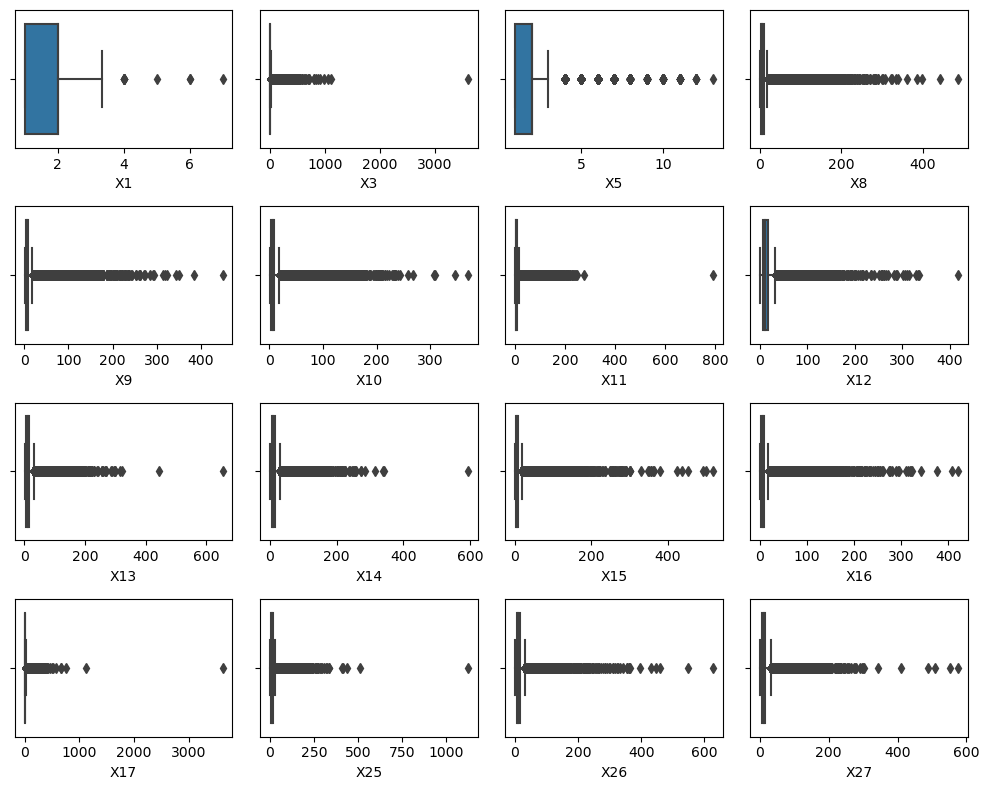

In [16]:
fig, axes = plt.subplots(nrows = 4, ncols=4, figsize = (10, 8))
axes = axes.flatten()

for i, col in enumerate(['X1', 'X3', 'X5', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14',
                         'X15', 'X16', 'X17', 'X25', 'X26', 'X27']):
    sns.boxplot(x= train_new[col], ax = axes[i])
    axes[i].set_title('')
plt.tight_layout()
plt.show()

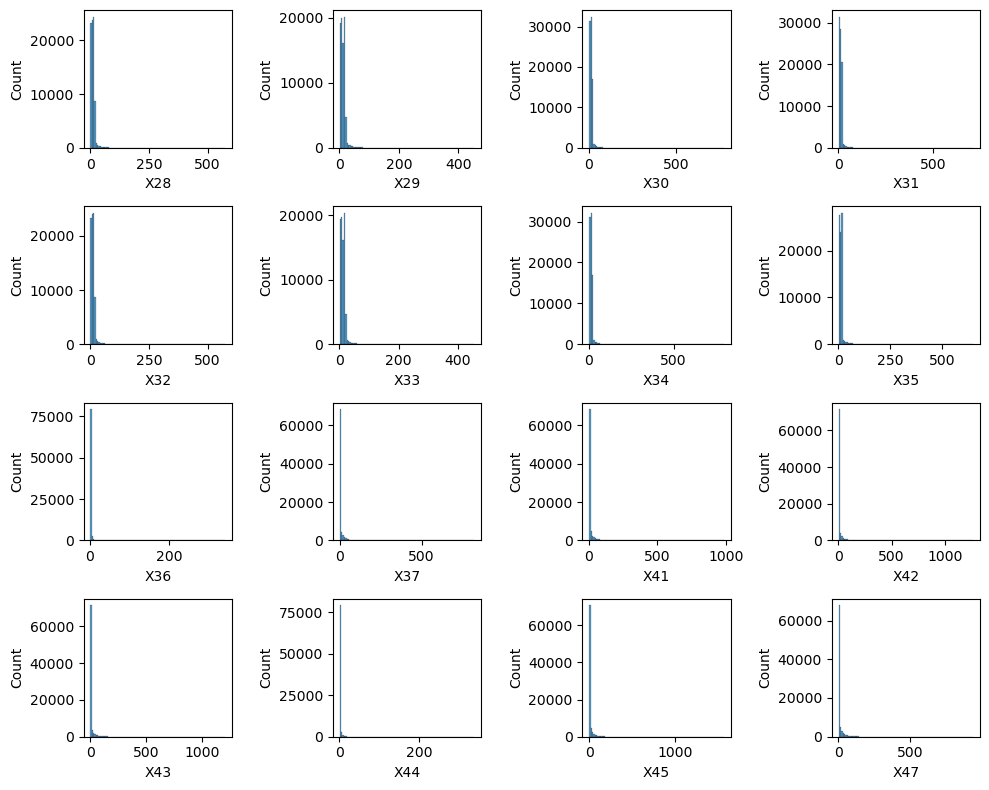

In [17]:
fig, axes = plt.subplots(nrows = 4, ncols=4, figsize = (10, 8))
axes = axes.flatten()

for i, col in enumerate(['X28', 'X29', 'X30', 'X31','X32', 'X33', 'X34', 'X35', 
                         'X36', 'X37', 'X41', 'X42', 'X43', 'X44','X45', 'X47']):
    sns.histplot(x= train_new[col], ax = axes[i], bins = 100)
    axes[i].set_title('')
plt.tight_layout()
plt.show()

#  log_train set

In [18]:
log_train.head()

,ID,time,source,event,object
0,43980,2013-11-11T16:30:11,browser,page_close,3T6XwoiMKgol57cm29Rjy8FXVFcIomxl
1,2648,2013-12-27T06:44:08,browser,access,UaqaZdJXEAHfzB9qbZkvAe2jc0xmI3Na
2,18588,2013-12-07T09:58:44,server,navigate,l0kj1vWrjGxi2YqQWGitPXDEoH5G5RYd
3,2679,2014-01-05T13:51:34,browser,access,S64EUU2p7wiyAtSxjzfSS6jLaHB3Y9RJ
4,2528,2013-12-17T12:09:36,server,access,DSPbj5O8mNBS0ccEiBGXnXJvTZstHNED


-- Seems like there's a lotta room for feature engineering

In [19]:
log_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5710093 entries, 0 to 5710092
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   ID      int64 
 1   time    object
 2   source  object
 3   event   object
 4   object  object
dtypes: int64(1), object(4)
memory usage: 217.8+ MB


In [20]:
#changing the data-type of time
log_train['time'] = pd.to_datetime(log_train['time'])

Split time into date and time

In [21]:
log_train['date'] = log_train['time'].dt.date
log_train['log_time'] = log_train['time'].dt.time

Drop time since its redundant now

In [22]:
log_train.drop('time', axis =1, inplace = True)

In [23]:

log_grouped = log_train.groupby('ID').agg(
    server=('source', lambda x: (x == 'server').sum()),
    browser=('source', lambda x: (x == 'browser').sum()),
    navigate=('event', lambda x: (x == 'navigate').sum()),
    wiki=('event', lambda x: (x == 'wiki').sum()),
    access=('event', lambda x: (x == 'access').sum()),
    page_close=('event', lambda x: (x == 'page_close').sum()),
    video=('event', lambda x: (x == 'video').sum()),
    problem=('event', lambda x: (x == 'problem').sum()),
    discussion=('event', lambda x: (x == 'discussion').sum()),
    total_logs=('log_time', 'count'),
    unique_days=('date', 'nunique'),
    objects = ('object', 'nunique')
).reset_index()




In [24]:
log_grouped.head()

,ID,server,browser,navigate,wiki,access,page_close,video,problem,discussion,total_logs,unique_days,objects
0,1,90,147,17,0,85,52,22,61,0,237,14,84
1,3,63,132,10,0,55,19,7,85,19,195,9,89
2,4,58,13,10,0,47,5,4,5,0,71,9,28
3,5,131,302,19,0,160,65,57,111,21,433,11,103
4,6,14,2,4,0,10,0,0,2,0,16,2,12


In [25]:
log_grouped.isna().sum()

ID             0
server         0
browser        0
navigate       0
wiki           0
access         0
page_close     0
video          0
problem        0
discussion     0
total_logs     0
unique_days    0
objects        0
dtype: int64

In [26]:
log_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114469 entries, 0 to 114468
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   ID           114469 non-null  int64
 1   server       114469 non-null  int64
 2   browser      114469 non-null  int64
 3   navigate     114469 non-null  int64
 4   wiki         114469 non-null  int64
 5   access       114469 non-null  int64
 6   page_close   114469 non-null  int64
 7   video        114469 non-null  int64
 8   problem      114469 non-null  int64
 9   discussion   114469 non-null  int64
 10  total_logs   114469 non-null  int64
 11  unique_days  114469 non-null  int64
 12  objects      114469 non-null  int64
dtypes: int64(13)
memory usage: 11.4 MB


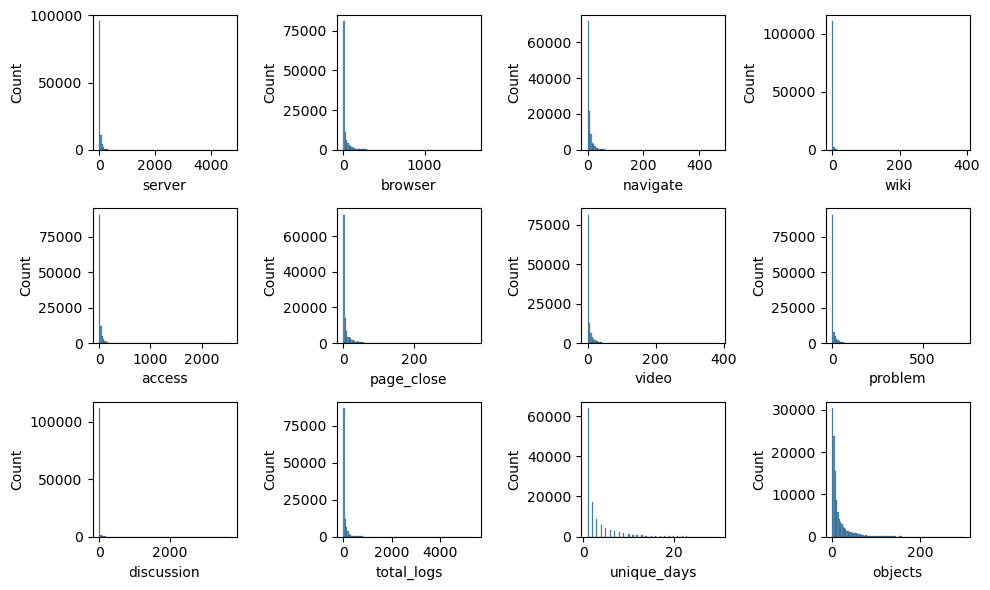

In [27]:
fig, axes = plt.subplots(nrows = 3, ncols=4, figsize = (10, 6))
axes = axes.flatten()

for i, col in enumerate(log_grouped.columns[1:]):
    sns.histplot(x= log_grouped[col], ax = axes[i], bins = 100)
    axes[i].set_title('')
plt.tight_layout()
plt.show()

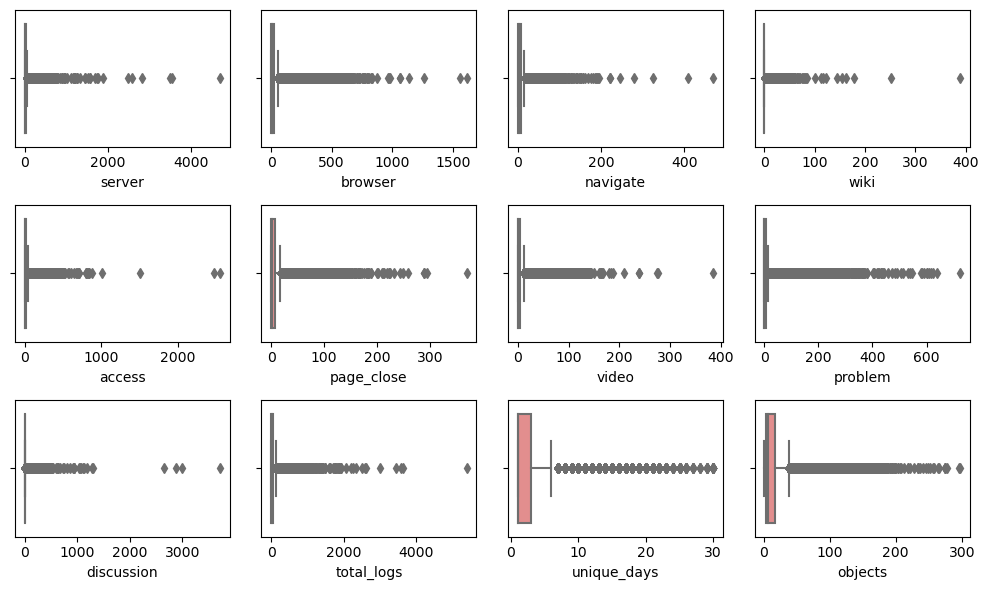

In [28]:
fig, axes = plt.subplots(nrows = 3, ncols=4, figsize = (10, 6))
axes = axes.flatten()

for i, col in enumerate(log_grouped.columns[1:]):
    sns.boxplot(x= log_grouped[col], ax = axes[i], color = 'lightcoral')
    axes[i].set_title('')
plt.tight_layout()
plt.show()

In [29]:
for col in log_grouped.columns[1:]:
    log_grouped[col] = np.log(log_grouped[col]+0.1)

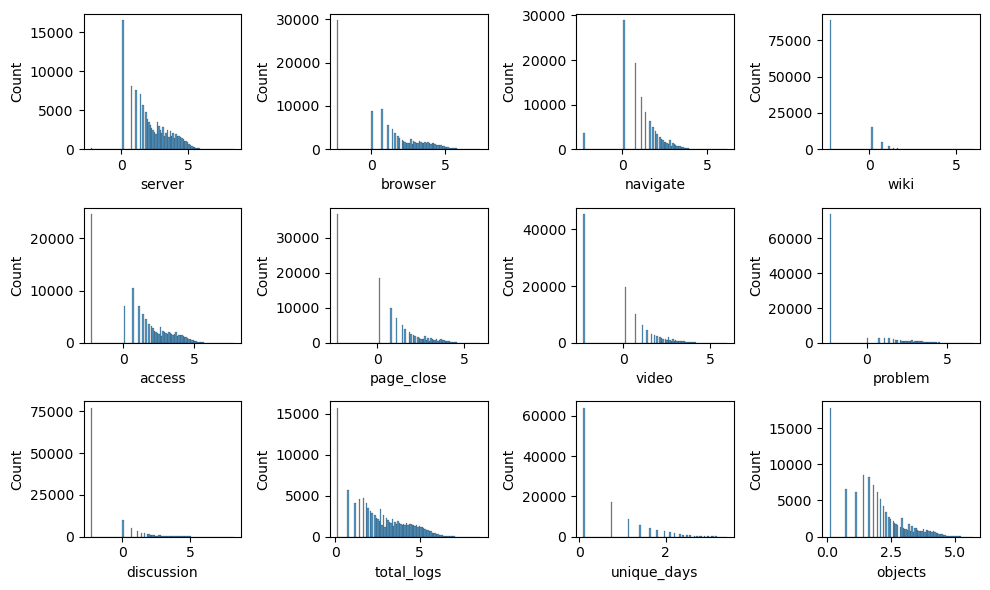

In [30]:
fig, axes = plt.subplots(nrows = 3, ncols=4, figsize = (10, 6))
axes = axes.flatten()

for i, col in enumerate(log_grouped.columns[1:]):
    sns.histplot(x= log_grouped[col], ax = axes[i], bins = 100)
    axes[i].set_title('')
plt.tight_layout()
plt.show()

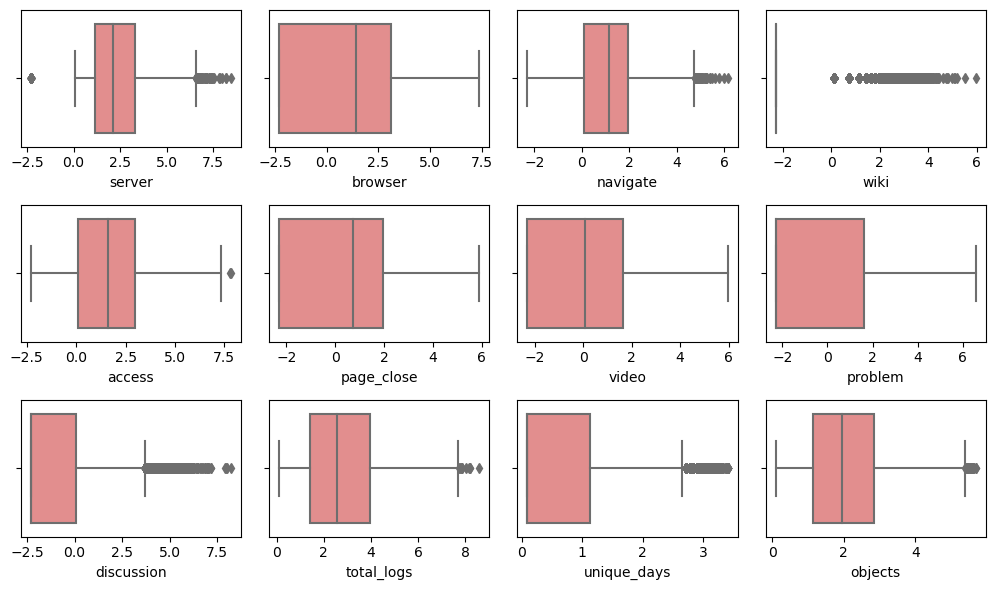

In [31]:
fig, axes = plt.subplots(nrows = 3, ncols=4, figsize = (10, 6))
axes = axes.flatten()

for i, col in enumerate(log_grouped.columns[1:]):
    sns.boxplot(x= log_grouped[col], ax = axes[i], color = 'lightcoral')
    axes[i].set_title('')
plt.tight_layout()
plt.show()

# --Merging the two train sets

In [32]:
train_new.head()

,ID,X1,X3,X5,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X41,X42,X43,X44,X45,X47,X48,X49,X50,X52,X56,X57,X64,X65,X69,X72,X74,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X90,X92,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X121,X122,X125,X126,X127,X128,X134,X135,X136,X137,X138,label
0,7054.0,2.015152,32.0,4.0,7.0,6.0,2.0,5.0,2.0,15.0,16.0,6.0,9.0,10.0,8.0,1.0,14.0,16.0,39.0,16.0,13.0,8.0,4.0,15.0,4.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,21.0,1.0,10.0,9.142857,1.0,1.0,1.0,1.0,18.0,2574.0,5.838710,7.0,1.0,5.0,8.0,11.0,27.0,2.0,3.0,6.0,4.0,1.000000,5.0,4.0,5.0,4.0,1.0,1.0,4.0,5.0,16.0,13.0,7.0,13.0,14.0,5.0,13.0,9.0,15.0,2.0,14.0,6.0,2.0,11.0,4.0,5.0,2.0,10.0,1.0,1.0,18.0,13.0,1.0,1.0,1.0,3.0,2.0,1
1,147131.0,1.000000,2.0,NaN,6.0,5.0,8.0,4.0,7.0,12.0,1.0,4.0,7.0,3.0,13.0,7.0,13.0,15.0,17.0,12.0,14.0,8.0,9.0,4.0,14.0,1.0,1.0,2.0,2.0,11.0,1.0,2.0,1.0,1.0,4.0,1.0,2.0,1.000000,3.0,1.0,1.0,1.0,16.0,961.0,1.751880,1.0,10.0,6.0,8.0,3.0,3.0,11.0,9.0,9.0,3.0,1.862069,4.0,2.0,2.0,4.0,8.0,2.0,1.0,3.0,5.0,9.0,16.0,16.0,4.0,3.0,1.0,14.0,2.0,16.0,14.0,17.0,1.0,4.0,6.0,4.0,2.0,1.0,1.0,1.0,9.0,4.0,3.0,1.0,1.0,2.0,10.0,1
2,132068.0,1.000000,1.0,2.0,9.0,1.0,7.0,10.0,7.0,17.0,3.0,9.0,10.0,1.0,17.0,3.0,7.0,20.0,17.0,5.0,13.0,3.0,8.0,13.0,14.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,3.0,1.0,1.0,2.0,2.000000,1.0,1.0,1.0,1.0,10.0,460.0,1.000000,3.0,8.0,4.0,2.0,8.0,1.0,2.0,3.0,6.0,4.0,1.000000,2.0,7.0,1.0,3.0,1.0,2.0,2.0,5.0,5.0,14.0,13.0,14.0,19.0,6.0,17.0,9.0,16.0,12.0,19.0,17.0,2.0,5.0,13.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,4.0,1
3,85195.0,2.071429,1.0,2.0,8.0,7.0,9.0,4.0,18.0,8.0,5.0,1.0,6.0,9.0,5.0,9.0,20.0,12.0,10.0,1.0,16.0,12.0,11.0,16.0,16.0,2.0,33.0,2.0,21.0,60.0,2.0,1.0,2.0,1.0,25.0,1.0,14.0,6.263158,8.0,1.0,1.0,1.0,18.0,934.0,6.384615,8.0,7.0,3.0,17.0,9.0,7.0,10.0,4.0,6.0,10.0,3.734375,5.0,5.0,4.0,9.0,1.0,2.0,60.0,13.0,28.0,7.0,6.0,5.0,13.0,9.0,20.0,6.0,13.0,17.0,34.0,70.0,2.0,7.0,20.0,5.0,2.8,14.0,1.0,1.0,12.0,12.0,2.0,2.0,1.0,4.0,2.0,1
4,191948.0,2.000000,2.0,2.0,14.0,2.0,2.0,4.0,4.0,3.0,7.0,9.0,7.0,2.0,6.0,12.0,20.0,8.0,7.0,6.0,8.0,19.0,7.0,20.0,20.0,4.0,2.0,2.0,2.0,2.0,3.0,2.0,11.0,2.0,3.0,1.0,2.0,NaN,1.0,1.0,1.0,1.0,3.0,1655.0,2.250000,1.0,5.0,3.0,5.0,2.0,4.0,9.0,1.0,5.0,4.0,1.000000,7.0,4.0,10.0,9.0,19.0,1.0,2.0,1.0,11.0,10.0,18.0,9.0,20.0,9.0,12.0,11.0,4.0,13.0,12.0,6.0,1.0,14.0,4.0,7.0,1.0,2.0,1.0,1.0,14.0,3.0,2.0,2.0,1.0,2.0,6.0,1


In [33]:
train_new['ID'] = pd.to_numeric(train_new['ID'], downcast='integer')

In [34]:
train_merged = train_new.merge(log_grouped, on = 'ID', how = 'left')

In [35]:
train_merged.head()

,ID,X1,X3,X5,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X41,X42,X43,X44,X45,X47,X48,X49,X50,X52,X56,X57,X64,X65,X69,X72,X74,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X90,X92,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X121,X122,X125,X126,X127,X128,X134,X135,X136,X137,X138,label,server,browser,navigate,wiki,access,page_close,video,problem,discussion,total_logs,unique_days,objects
0,7054.0,2.015152,32.0,4.0,7.0,6.0,2.0,5.0,2.0,15.0,16.0,6.0,9.0,10.0,8.0,1.0,14.0,16.0,39.0,16.0,13.0,8.0,4.0,15.0,4.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,21.0,1.0,10.0,9.142857,1.0,1.0,1.0,1.0,18.0,2574.0,5.838710,7.0,1.0,5.0,8.0,11.0,27.0,2.0,3.0,6.0,4.0,1.000000,5.0,4.0,5.0,4.0,1.0,1.0,4.0,5.0,16.0,13.0,7.0,13.0,14.0,5.0,13.0,9.0,15.0,2.0,14.0,6.0,2.0,11.0,4.0,5.0,2.0,10.0,1.0,1.0,18.0,13.0,1.0,1.0,1.0,3.0,2.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,147131.0,1.000000,2.0,NaN,6.0,5.0,8.0,4.0,7.0,12.0,1.0,4.0,7.0,3.0,13.0,7.0,13.0,15.0,17.0,12.0,14.0,8.0,9.0,4.0,14.0,1.0,1.0,2.0,2.0,11.0,1.0,2.0,1.0,1.0,4.0,1.0,2.0,1.000000,3.0,1.0,1.0,1.0,16.0,961.0,1.751880,1.0,10.0,6.0,8.0,3.0,3.0,11.0,9.0,9.0,3.0,1.862069,4.0,2.0,2.0,4.0,8.0,2.0,1.0,3.0,5.0,9.0,16.0,16.0,4.0,3.0,1.0,14.0,2.0,16.0,14.0,17.0,1.0,4.0,6.0,4.0,2.0,1.0,1.0,1.0,9.0,4.0,3.0,1.0,1.0,2.0,10.0,1,0.095310,-2.302585,0.095310,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,0.095310,0.095310,0.095310
2,132068.0,1.000000,1.0,2.0,9.0,1.0,7.0,10.0,7.0,17.0,3.0,9.0,10.0,1.0,17.0,3.0,7.0,20.0,17.0,5.0,13.0,3.0,8.0,13.0,14.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,3.0,1.0,1.0,2.0,2.000000,1.0,1.0,1.0,1.0,10.0,460.0,1.000000,3.0,8.0,4.0,2.0,8.0,1.0,2.0,3.0,6.0,4.0,1.000000,2.0,7.0,1.0,3.0,1.0,2.0,2.0,5.0,5.0,14.0,13.0,14.0,19.0,6.0,17.0,9.0,16.0,12.0,19.0,17.0,2.0,5.0,13.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,4.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,85195.0,2.071429,1.0,2.0,8.0,7.0,9.0,4.0,18.0,8.0,5.0,1.0,6.0,9.0,5.0,9.0,20.0,12.0,10.0,1.0,16.0,12.0,11.0,16.0,16.0,2.0,33.0,2.0,21.0,60.0,2.0,1.0,2.0,1.0,25.0,1.0,14.0,6.263158,8.0,1.0,1.0,1.0,18.0,934.0,6.384615,8.0,7.0,3.0,17.0,9.0,7.0,10.0,4.0,6.0,10.0,3.734375,5.0,5.0,4.0,9.0,1.0,2.0,60.0,13.0,28.0,7.0,6.0,5.0,13.0,9.0,20.0,6.0,13.0,17.0,34.0,70.0,2.0,7.0,20.0,5.0,2.8,14.0,1.0,1.0,12.0,12.0,2.0,2.0,1.0,4.0,2.0,1,2.839078,3.139833,1.629241,0.095310,2.646175,2.312535,2.208274,0.095310,-2.302585,3.691376,0.741937,2.949688
4,191948.0,2.000000,2.0,2.0,14.0,2.0,2.0,4.0,4.0,3.0,7.0,9.0,7.0,2.0,6.0,12.0,20.0,8.0,7.0,6.0,8.0,19.0,7.0,20.0,20.0,4.0,2.0,2.0,2.0,2.0,3.0,2.0,11.0,2.0,3.0,1.0,2.0,NaN,1.0,1.0,1.0,1.0,3.0,1655.0,2.250000,1.0,5.0,3.0,5.0,2.0,4.0,9.0,1.0,5.0,4.0,1.000000,7.0,4.0,10.0,9.0,19.0,1.0,2.0,1.0,11.0,10.0,18.0,9.0,20.0,9.0,12.0,11.0,4.0,13.0,12.0,6.0,1.0,14.0,4.0,7.0,1.0,2.0,1.0,1.0,14.0,3.0,2.0,2.0,1.0,2.0,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


-- After merging, we see there are a lotta nulls in columns [ 'server', 'browser', 'navigate', 'wiki', 'access','page_close','video', 'problem', 'discussion', 'total_logs', 'unique_days','objects'].
Here we have a coupla strategies to impute.

* Imputing with Median: Since the distribution of the data is skewed, using the median to impute missing values is a suitable approach. The median is robust to outliers and can provide a representative value for the missing data.

* Iterative Imputer: The iterative imputer is a more advanced technique that iteratively estimates missing values based on observed data. It works by modeling each feature with missing values as a function of other features and then estimating the missing values using that model. The process iterates until convergence, refining the estimates in each iteration.
Iterative imputation is useful when the relationship between features is complex and can capture dependencies between variables.
It provides a more sophisticated approach compared to simple imputation methods like mean or median imputation.

# -- Median Imputation


In [36]:
imputer = SimpleImputer(strategy = 'median')

train_imputed = imputer.fit_transform(train_merged)

In [37]:
train_imputed_df = pd.DataFrame(train_imputed, columns = train_merged.columns)

In [38]:
train_imputed_df.head()

,ID,X1,X3,X5,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X41,X42,X43,X44,X45,X47,X48,X49,X50,X52,X56,X57,X64,X65,X69,X72,X74,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X90,X92,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X121,X122,X125,X126,X127,X128,X134,X135,X136,X137,X138,label,server,browser,navigate,wiki,access,page_close,video,problem,discussion,total_logs,unique_days,objects
0,7054.0,2.015152,32.0,4.0,7.0,6.0,2.0,5.0,2.0,15.0,16.0,6.0,9.0,10.0,8.0,1.0,14.0,16.0,39.0,16.0,13.0,8.0,4.0,15.0,4.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,21.0,1.0,10.0,9.142857,1.0,1.0,1.0,1.0,18.0,2574.0,5.838710,7.0,1.0,5.0,8.0,11.0,27.0,2.0,3.0,6.0,4.0,1.000000,5.0,4.0,5.0,4.0,1.0,1.0,4.0,5.0,16.0,13.0,7.0,13.0,14.0,5.0,13.0,9.0,15.0,2.0,14.0,6.0,2.0,11.0,4.0,5.0,2.0,10.0,1.0,1.0,18.0,13.0,1.0,1.0,1.0,3.0,2.0,1.0,2.208274,1.410987,1.131402,-2.302585,1.629241,0.741937,0.095310,-2.302585,-2.302585,2.646175,0.095310,1.960095
1,147131.0,1.000000,2.0,2.0,6.0,5.0,8.0,4.0,7.0,12.0,1.0,4.0,7.0,3.0,13.0,7.0,13.0,15.0,17.0,12.0,14.0,8.0,9.0,4.0,14.0,1.0,1.0,2.0,2.0,11.0,1.0,2.0,1.0,1.0,4.0,1.0,2.0,1.000000,3.0,1.0,1.0,1.0,16.0,961.0,1.751880,1.0,10.0,6.0,8.0,3.0,3.0,11.0,9.0,9.0,3.0,1.862069,4.0,2.0,2.0,4.0,8.0,2.0,1.0,3.0,5.0,9.0,16.0,16.0,4.0,3.0,1.0,14.0,2.0,16.0,14.0,17.0,1.0,4.0,6.0,4.0,2.0,1.0,1.0,1.0,9.0,4.0,3.0,1.0,1.0,2.0,10.0,1.0,0.095310,-2.302585,0.095310,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,-2.302585,0.095310,0.095310,0.095310
2,132068.0,1.000000,1.0,2.0,9.0,1.0,7.0,10.0,7.0,17.0,3.0,9.0,10.0,1.0,17.0,3.0,7.0,20.0,17.0,5.0,13.0,3.0,8.0,13.0,14.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,3.0,1.0,1.0,2.0,2.000000,1.0,1.0,1.0,1.0,10.0,460.0,1.000000,3.0,8.0,4.0,2.0,8.0,1.0,2.0,3.0,6.0,4.0,1.000000,2.0,7.0,1.0,3.0,1.0,2.0,2.0,5.0,5.0,14.0,13.0,14.0,19.0,6.0,17.0,9.0,16.0,12.0,19.0,17.0,2.0,5.0,13.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,4.0,1.0,2.208274,1.410987,1.131402,-2.302585,1.629241,0.741937,0.095310,-2.302585,-2.302585,2.646175,0.095310,1.960095
3,85195.0,2.071429,1.0,2.0,8.0,7.0,9.0,4.0,18.0,8.0,5.0,1.0,6.0,9.0,5.0,9.0,20.0,12.0,10.0,1.0,16.0,12.0,11.0,16.0,16.0,2.0,33.0,2.0,21.0,60.0,2.0,1.0,2.0,1.0,25.0,1.0,14.0,6.263158,8.0,1.0,1.0,1.0,18.0,934.0,6.384615,8.0,7.0,3.0,17.0,9.0,7.0,10.0,4.0,6.0,10.0,3.734375,5.0,5.0,4.0,9.0,1.0,2.0,60.0,13.0,28.0,7.0,6.0,5.0,13.0,9.0,20.0,6.0,13.0,17.0,34.0,70.0,2.0,7.0,20.0,5.0,2.8,14.0,1.0,1.0,12.0,12.0,2.0,2.0,1.0,4.0,2.0,1.0,2.839078,3.139833,1.629241,0.095310,2.646175,2.312535,2.208274,0.095310,-2.302585,3.691376,0.741937,2.949688
4,191948.0,2.000000,2.0,2.0,14.0,2.0,2.0,4.0,4.0,3.0,7.0,9.0,7.0,2.0,6.0,12.0,20.0,8.0,7.0,6.0,8.0,19.0,7.0,20.0,20.0,4.0,2.0,2.0,2.0,2.0,3.0,2.0,11.0,2.0,3.0,1.0,2.0,2.000000,1.0,1.0,1.0,1.0,3.0,1655.0,2.250000,1.0,5.0,3.0,5.0,2.0,4.0,9.0,1.0,5.0,4.0,1.000000,7.0,4.0,10.0,9.0,19.0,1.0,2.0,1.0,11.0,10.0,18.0,9.0,20.0,9.0,12.0,11.0,4.0,13.0,12.0,6.0,1.0,14.0,4.0,7.0,1.0,2.0,1.0,1.0,14.0,3.0,2.0,2.0,1.0,2.0,6.0,1.0,2.208274,1.410987,1.131402,-2.302585,1.629241,0.741937,0.095310,-2.302585,-2.302585,2.646175,0.095310,1.960095


In [39]:
train_imputed_df.shape

(84377, 104)

In [40]:
train_imputed_df.isna().sum().sum()

0

In [41]:
X, y = train_imputed_df.drop('label', axis=1), train_imputed_df['label']

# -- The plot below points to the problem of class Imbalance

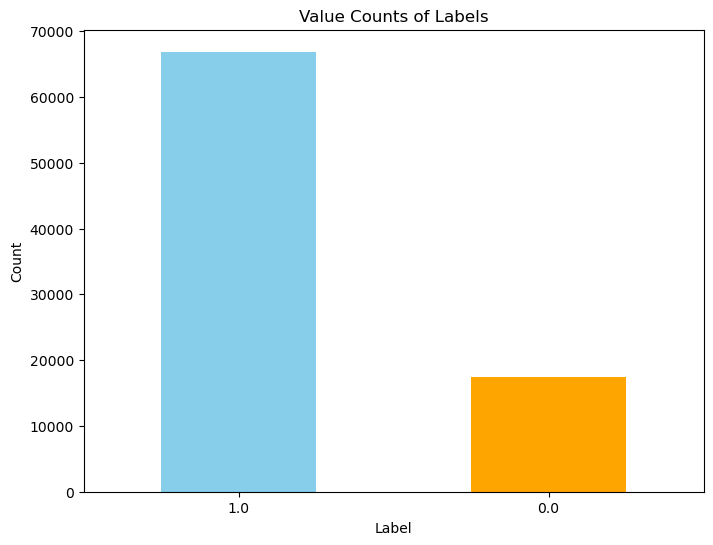

In [42]:

label_counts = train_imputed_df['label'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Value Counts of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.show()


# -- Lets use oversampling to balance the classes

In [43]:
smote = SMOTE()
X_resampled , y_resampled = smote.fit_resample(X, y)

In [44]:
X_resampled.shape , y_resampled.shape

((133776, 103), (133776,))

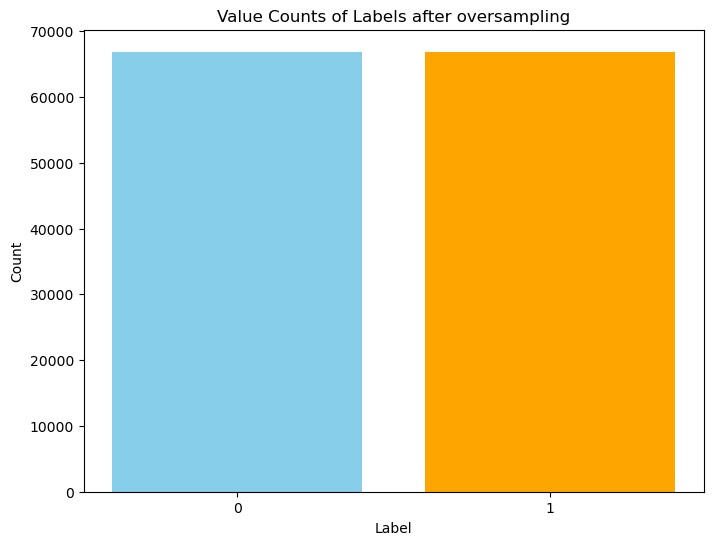

In [45]:

label_counts = np.bincount(y_resampled)

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(range(len(label_counts)), label_counts, color=['skyblue', 'orange'])
plt.title('Value Counts of Labels after oversampling')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(range(len(label_counts)))  
plt.show()


In [69]:
X_resampled.shape, y_resampled.shape

((133776, 103), (133776,))

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 11)

In [71]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((107020, 103), (26756, 103), (107020,), (26756,))

In [49]:

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classification": SVC(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBoost Classifier": xgb.XGBClassifier(),
    "LightGBM Classifier": lgb.LGBMClassifier()
}

# Hash map to store mean cross-validation scores for each classifier
mean_scores = {}

# Perform cross-validation for each classifier and store mean scores
for clf_name, clf in classifiers.items():
    scores = cross_val_score(clf, X, y, cv=5)  # 5-fold cross-validation
    mean_scores[clf_name] = np.mean(scores)




/Users/arjunreddypulugu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/arjunreddypulugu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

[LightGBM] [Info] Number of positive: 53510, number of negative: 13991
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006956 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16130
[LightGBM] [Info] Number of data points in the train set: 67501, number of used features: 102
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.792729 -> initscore=1.341454
[LightGBM] [Info] Start training from score 1.341454
[LightGBM] [Info] Number of positive: 53510, number of negative: 13991
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16085
[LightGBM] [Info] Number of data points in the train set: 67501, number of used features: 102
[LightGBM] [Info

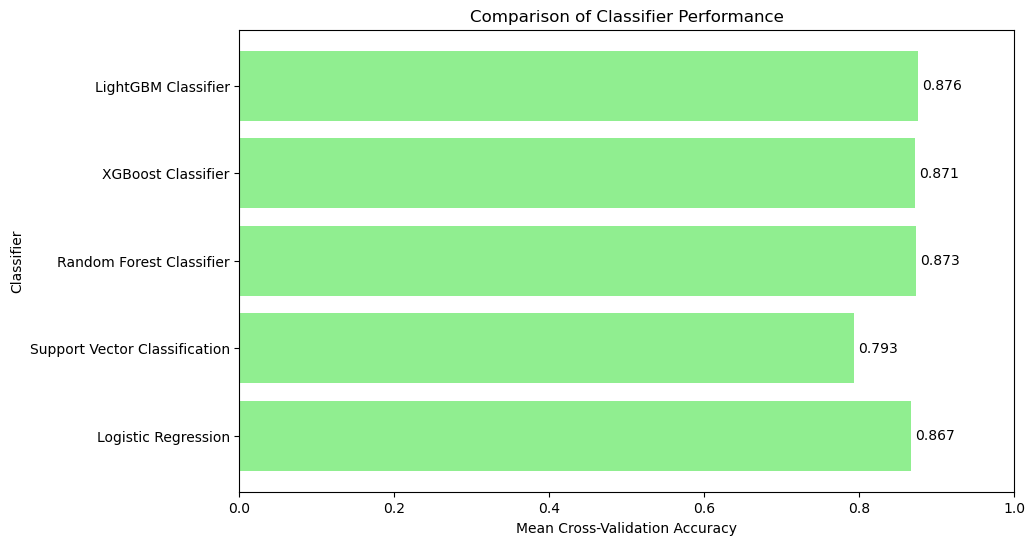

In [50]:
# Visualize the performance of different classifiers
plt.figure(figsize=(10, 6))
bars = plt.barh(list(mean_scores.keys()), list(mean_scores.values()), color='lightgreen')
plt.xlabel('Mean Cross-Validation Accuracy')
plt.ylabel('Classifier')
plt.title('Comparison of Classifier Performance')
plt.xlim(0, 1)  # Set x-axis limit from 0 to 1


# Add scores as labels on the bars
plt.bar_label(bars, fmt='%.3f', padding=3)

plt.show()


In [80]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

preds = model.predict(X_test)


In [81]:
print('f1_score :', f1_score )
print('accuracy :', accuracy )

f1_score : 0.922095538365656
accuracy : 0.92057856181791


In [82]:
confusion_matrix

array([[12055,  1193],
       [  932, 12576]])

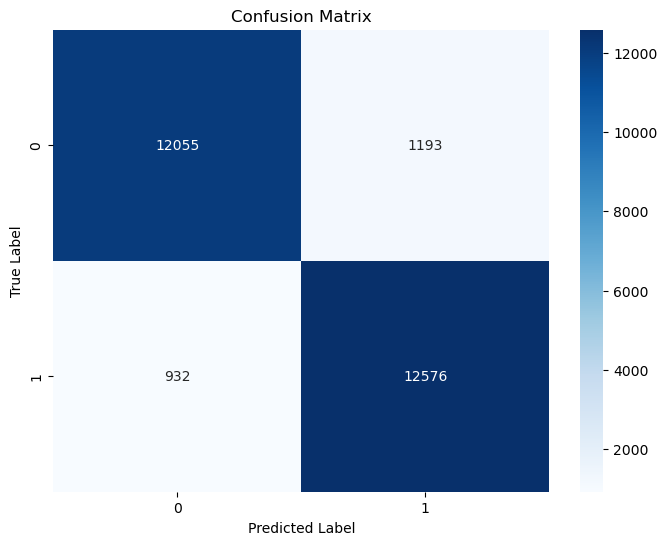

In [83]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [88]:
# Extracting the feature importances
feature_importances = model.feature_importances_

# Converting to data frame
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sorting the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending = False)

In [101]:
features_imp = feature_importance_df[~feature_importance_df['Feature'].str.match(r'^X\d+$')]

In [102]:
features_imp['Importance'] = features_imp['Importance']*10

/var/folders/xq/x6kbvt157ll1zyfflzqt65ww0000gn/T/ipykernel_68502/3969179254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_imp['Importance'] = features_imp['Importance']*10


In [103]:
features_imp

,Feature,Importance
101,unique_days,0.150610
97,video,0.117052
94,wiki,0.090388
102,objects,0.062889
98,problem,0.049914
91,server,0.031656
93,navigate,0.023576
96,page_close,0.023405
99,discussion,0.020823
0,ID,0.019796


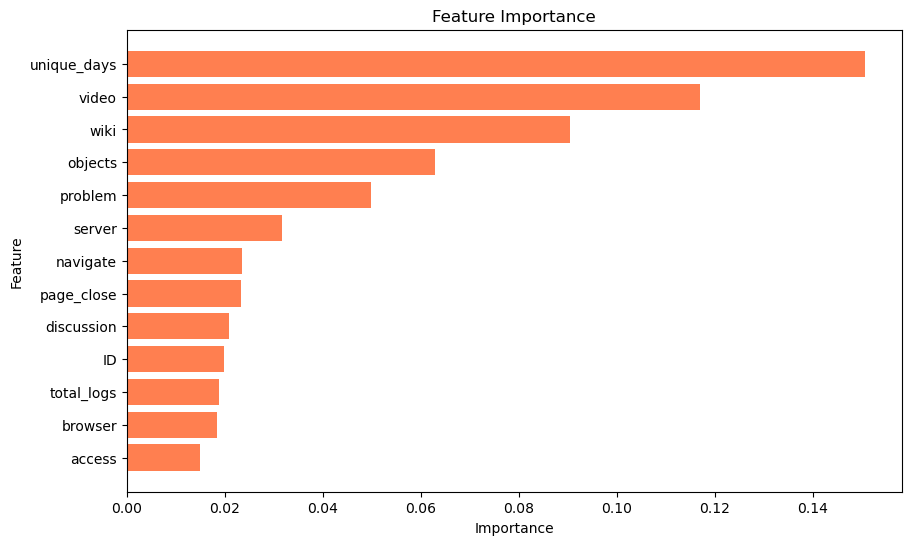

In [106]:
# Bar Plot
plt.figure(figsize=(10, 6))
plt.barh(features_imp['Feature'], features_imp['Importance'], color='coral')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()

In [114]:
# 3D Pie Chart using plotly
fig = go.Figure(data=[go.Pie(
    labels=features_imp['Feature'],
    values=features_imp['Importance'],
    hole=0.2
)])
fig.update_layout(
    title='Feature Importance (3D Pie Chart)',
    scene=dict(
        aspectratio=dict(x=1, y=1, z=1)
    )
)
fig.show()